<h3 align="center" style="font-size:35pt" >
    HW 2 <br\>  
    <p style="font-size:20pt">
    <u>Team Members: </u>  
    <p style="font-size:18pt">
    Brandt Lawson <br\><br\>  
    Stephen Kelly <br\><br\>  
    insert here   <br\><br\>  
    insert here

# <p style="font-size:20pt; text-decoration: underline;"> Part 2: LTCM Risk  </p> 
<br/>

## <p style="font-size:18pt"> 1. Summary Stats
 
<p style="font-size:16pt"> a) For both the gross and net series of LTCM excess returns, report the mean and volatility. Since this is monthly data, scale the mean by 12, and scale the volatility by <font size="-1.5">$\sqrt{12}$ <font size="+3">

In [32]:
import pandas as pd
import numpy as np
import math

# ./ steps into this file's folder and lets you access the data file by just its name
path_to_data_file = './hedge_data.xls' 
LTCM_excess_returns = pd.read_excel(path_to_data_file)

def mean_vol(data):

    mean = data.mean()*12
    vol = data.std()*math.sqrt(12)
    df = pd.DataFrame(data={'Mean': mean, 'Vol': vol});
    return df

display(mean_vol(LTCM_excess_returns))

,Mean,Vol
gross,0.257153,0.137987
net,0.168918,0.113187


<p style="font-size:16pt"> b) Report the annualized Sharpe ratio, (the SR based on the annualized mean and volatility.)


In [34]:
def sharpe_calc(mean_vol):
    mean_vol['Sharpe'] = mean_vol['Mean']/mean_vol['Vol']
    return mean_vol
sharpe_calc(mean_vol(LTCM_excess_returns))

,Mean,Vol,Sharpe
gross,0.257153,0.137987,1.863603
net,0.168918,0.113187,1.492373


<p style="font-size:16pt"> c) Comment on whether the mean, volatility, and Sharpe ratio seem especially high or low relative to other assets we have seen.

* Commentary goes here

## 2. Using the series of net LTCM excess returns, denoted  $\tilde{r}$<sub>$t$</sub><sup>LTCM</sup>, estimate the following <p style="margin-left:1.25em">regression:</p> 
<h3 align="center" style="font-size:20pt">
    $\tilde{r}$<sub>$t$</sub><sup>LTCM</sup> =
    $\alpha$ +
    $\beta$<sup>m</sup> $\tilde{r}$<sub>$t$</sub><sup>m</sup> +
    $\epsilon$<sub>$t$</sub> <br/>

<p style="font-size:16pt"> a) Report $\alpha$ and $\beta$<sup>m</sup>.  Report the $R$<sup>2</sup> stat.

In [119]:
from scipy import stats

market_return = pd.read_excel('./hedge_data.xls', sheet_name='MktExcessRets',  index_col='date')

def alpha_beta_R2(market_data, security_return):
    
    x = market_data.loc['1994-04-30':'1998-06-30',:].values
    x = x.reshape(51,)
    alpha_beta_R2.x = x
    y = security_return.loc[:,'net'].values
    alpha_beta_R2.y = y

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

    alpha_beta_R2.beta_m = slope
    alpha_beta_R2.alpha = intercept
    alpha_beta_R2.rsquared = rvalue
    alpha_beta_R2.answer = pd.DataFrame([{'Alpha' : str(intercept) , 'Beta' : str(slope) , 'RSquared' : str(rvalue)}])

alpha_beta_R2(market_return, LTCM_excess_returns)
alpha_beta_R2.answer

,Alpha,Beta,RSquared
0,0.013430806247735787,0.042027927715985784,0.04063656913244539


<p style="font-size:16pt"> b) From this regression, does LTCM appear to have much exposure to the equity-market factor,  $\tilde{r}$<sub>$t$</sub><sup>m</sup> ?
    
    No because the beta_m value tells us how much exposure the LTCM has to the market 
    equity factor. So, since beta is relatively small, and a full one unit increase in the 
    market equity is unlikely it appears that the LCTM does not have much exposure to the
    market equity factor. 
 

## 3. Regression-based metrics.


<p style="font-size:16pt">a) Calculate the Treynor ratio.



In [148]:
def TR(net_return_data):
    expected_r = net_return_data.mean()
    treynor = expected_r / alpha_beta_R2.beta_m
    
    print("Treynor Ratio:", treynor)

TR(LTCM_excess_returns.loc[:,'net'])

Treynor Ratio: 0.3349313504905727


<p style="font-size:16pt">b) Calculate the Information ratio.



In [149]:
# I believe this should be alpha (from Q2) divided by the standard deviation of the residuals. To find
# residuals, I think we could do x*beta + alpha = prediction, -----> residual = prediction-LTCM_return, but
# put that into a loop to calculate the residual for each month, and then say .std()
# That is what I gathered from the demo regression .ipynb thingy the prof posted yesterday, but I could be
# tottally wrong and just over complicating it... :P
predictions = alpha_beta_R2.beta_m*alpha_beta_R2.x + alpha_beta_R2.alpha
residuals = predictions-alpha_beta_R2.y

#z = y-x #y here should be r^LCTM, so if I'm wrong about that then correct this. 
#info_rat = z.mean()/z.std()
info_rat = alpha_beta_R2.alpha/(residuals).std()
print("Infomation Ratio:", info_rat)

Infomation Ratio: 0.41548366282335936


## 4. Tail risk.
<p style="font-size:16pt">a) Calculate the 5th worst return of the sample.

In [126]:
#Using the net LTCM returns

LTCM_excess_returns_sorted = LTCM_excess_returns.sort_values(by=['net'],ascending=True, ignore_index=True)
LTCM_excess_returns_sorted.index = LTCM_excess_returns_sorted.index + 1
LTCM_excess_returns_sorted['date'] = LTCM_excess_returns_sorted['date'].astype(str)
df = LTCM_excess_returns_sorted.loc[5::-1,['date', 'net']].style.set_properties(subset=pd.IndexSlice[pd.IndexSlice[5], pd.IndexSlice[:]], **{'background-color': '#ff6666', 'color': 'black'})
df

,date,net
5,1997-05-31,-0.018100
4,1997-12-31,-0.021700
3,1994-05-31,-0.031500
2,1998-04-30,-0.068200
1,1998-05-31,-0.104900


<p style="font-size:16pt">b) Calculate the mean of the worst 4 returns from the sample.

In [127]:
LTCM_excess_returns_sorted.loc[:4,['date','net']].mean()

net   -0.056575
dtype: float64

<p style="font-size:16pt"> c) Report the skewness of the return distribution. Compare to a normal distribution with <p style="margin-left:1.15em;font-size:16pt"> skewness of 0.</p>

* The skewness of the returns is negative meaning the returns distrobutions are skewed left

The Skewness of the return distribution is -0.8318899364747497


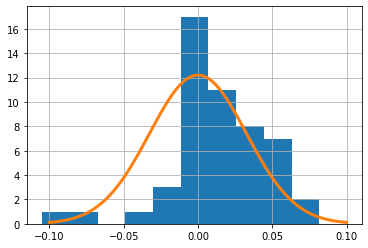

In [128]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
import matplotlib.pyplot as plt

print("The Skewness of the return distribution is " + str(skew(LTCM_excess_returns.iloc[:,2:])[0]))

LTCM_excess_returns.loc[:,'net'].hist()
x = np.linspace(-.1,.1,1000)
y = norm.pdf(x, loc=0, scale=LTCM_excess_returns.loc[:,'net'].std())
plt.plot(x,y, linewidth=3);

<p style="font-size:16pt">d) Report the kurtosis of the return distribution. Compare to a normal distribution with
<p style="margin-left:1.15em;font-size:16pt"> kurtosis of three.</p>

* The Kurt of the returns is larger than a normal distrobution. This means the returns have fatter tails i.e. occurances far from the mean are more likely and dont trail off in the same way a normal distrobution does.

In [129]:
print("The kurtosis of the return distribution is " + str(kurtosis(LTCM_excess_returns.iloc[:,2:])[0]))

The kurtosis of the return distribution is 2.5874860101941097


# <p style="font-size:20pt"> <p style="text-decoration: underline;"> Part 3: Other Hedge Fund Indexes  </p> 
<br/>



## <p style="font-size:18pt"> 1. Report the summary statistics for each series:

In [154]:
hedge_excess_rets = pd.read_excel('./hedge_data.xls', sheet_name='HedgeFund_ExcessRets',  index_col='date')

hedge_df = sharpe_calc(mean_vol(hedge_excess_rets))
hedge_df['Skew'] = skew(hedge_excess_rets)
hedge_df['Kurt'] = kurtosis(hedge_excess_rets)
hedge_df['5th Percentile'] = hedge_excess_rets.quantile(0.05)
display(hedge_df)

,Mean,Vol,Sharpe,Skew,Kurt,5th Percentile
Total Index,0.060352,0.073219,0.824271,-0.255788,2.687899,-0.02662
Convertible Arbitrage,0.045781,0.068567,0.667692,-2.640268,16.055310,-0.02196
Dedicated Short Bias,-0.065563,0.168179,-0.389838,0.686362,1.406305,-0.07568
Emerging Markets,0.051445,0.145699,0.353094,-0.880097,5.461583,-0.07074
Equity Market Neutral,0.024741,0.101881,0.242846,-11.994984,163.817752,-0.01298
Event Driven,0.060629,0.062192,0.974869,-2.297830,11.399109,-0.02644
Event Driven Distressed,0.070747,0.064908,1.089955,-2.273809,11.760753,-0.02422
Event Driven Multi-Strategy,0.055888,0.067533,0.827567,-1.777191,7.867451,-0.02698
Event Driven Risk Arbitrage,0.033653,0.040749,0.825869,-1.102150,5.114039,-0.01528
Fixed Income Arbitrage,0.027131,0.056769,0.477915,-4.419136,30.827036,-0.01366


## <p style="font-size:18pt"> 2. For each series, run a regression of the series on the market-equity factor:

In [ ]:
hedge_excess_rets = pd.read_excel('./hedge_data.xls', sheet_name='HedgeFund_ExcessRets',  index_col='date')

for (columnName, columnData) in hedge_excess_rets.iteritems():
    beta_hat = columnData.loc['1994-04-30':'1998-06-30']
    x = beta_hat.values.reshape(51,)
    y = raw_data.loc[:,'net'].values
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    alpha = intercept
    beta_m = slope
    expected_r = y.mean()
    treynor = expected_r / beta_m
    z = y-x #y here should be r^LCTM, so if I'm wrong about that then correct this. 
    info_rat = z.mean()/z.std()
    display('alpha = ' + str(alpha),'beta = ' + str(beta_m),'rsquared = ' + str(rvalue), 'Treynor = ' + str(treynor), 'Information Ratio = ' + str(info_rat))
    
    
    

# Sources

https://www.w3schools.com/html/html_styles.asp

https://developer.mozilla.org/en-US/docs/Web/HTML/Element/sup

https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

https://www.w3schools.com/python/python_ml_linear_regression.asp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.set_properties.html